In [ ]:
!pip freeze > requirements.txt

In [ ]:

import pandas as pd

master_data = pd.read_csv('ios.csv',sep=',', encoding='latin-1')
print('data shape: ', master_data.shape)
master_data.head()



data shape:  (143, 56)


,ios version,MMS_sending,Battery,phone_freez_crash,app compatibility,syncing,bluetooth,app crash,slow performence,security_vulnerabilities,...,auto_correct,notification,apple_pay,icloud,charging_issue,face_id,voicemail,home_pod,ios_version,total_bugs
0,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,8
1,3.1,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,6
2,3.1.2,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.12,4
3,3.1.3,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.13,6
4,3.2,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,5


In [ ]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ios version               143 non-null    object 
 1   MMS_sending               3 non-null      float64
 2   Battery                   64 non-null     float64
 3   phone_freez_crash         1 non-null      float64
 4   app compatibility         7 non-null      float64
 5   syncing                   5 non-null      float64
 6   bluetooth                 47 non-null     float64
 7   app crash                 43 non-null     float64
 8   slow performence          12 non-null     float64
 9   security_vulnerabilities  3 non-null      float64
 10  Wifi                      61 non-null     float64
 11  sensor                    4 non-null      float64
 12  ringing                   1 non-null      float64
 13  vibration                 1 non-null      float64
 14  audio_play

In [ ]:
mydataset_without_null = master_data.fillna(0)
mydataset_without_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ios version               143 non-null    object 
 1   MMS_sending               143 non-null    float64
 2   Battery                   143 non-null    float64
 3   phone_freez_crash         143 non-null    float64
 4   app compatibility         143 non-null    float64
 5   syncing                   143 non-null    float64
 6   bluetooth                 143 non-null    float64
 7   app crash                 143 non-null    float64
 8   slow performence          143 non-null    float64
 9   security_vulnerabilities  143 non-null    float64
 10  Wifi                      143 non-null    float64
 11  sensor                    143 non-null    float64
 12  ringing                   143 non-null    float64
 13  vibration                 143 non-null    float64
 14  audio_play

In [ ]:
data_copy = mydataset_without_null.drop(['ios version'], axis=1)
data_copy = data_copy.drop(['total_bugs'], axis=1)

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MMS_sending               143 non-null    float64
 1   Battery                   143 non-null    float64
 2   phone_freez_crash         143 non-null    float64
 3   app compatibility         143 non-null    float64
 4   syncing                   143 non-null    float64
 5   bluetooth                 143 non-null    float64
 6   app crash                 143 non-null    float64
 7   slow performence          143 non-null    float64
 8   security_vulnerabilities  143 non-null    float64
 9   Wifi                      143 non-null    float64
 10  sensor                    143 non-null    float64
 11  ringing                   143 non-null    float64
 12  vibration                 143 non-null    float64
 13  audio_playback            143 non-null    float64
 14  display_is

In [ ]:
pred_data = pd.read_csv('pred.csv',sep=',', encoding='latin-1')
pred_data

,ios version,MMS_sending,Battery,phone_freez_crash,app compatibility,syncing,bluetooth,app crash,slow performence,security_vulnerabilities,...,haptic_feedback,auto_correct,notification,apple_pay,icloud,charging_issue,face_id,voicemail,home_pod,ios_version
0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [ ]:

summ=0
heatmap_list=[]

def train(i):
    try:
      y=data_copy.iloc[:, i].values
      x=data_copy.iloc[:, 53].values
      x=x.reshape(-1,1)
      from sklearn.ensemble import GradientBoostingClassifier
      from sklearn.model_selection import train_test_split
      #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, shuffle=True)
      clf = GradientBoostingClassifier(n_estimators=100, learning_rate=2,max_depth=1, random_state=42).fit(x, y)

      pred_data = pd.read_csv('pred.csv',sep=',', encoding='latin-1')
      df = pred_data.drop(['ios version'], axis=1)

      f_x=df['ios_version'].values
      f_x=f_x.reshape(-1,1)

      pred = clf.predict(f_x)
      print(pred)
      type(pred)
      temp = pred[:1]
      global summ
      summ = summ + temp
      global heatmap_list
      heatmap_list.append(pred.item())


    except:
      print('--------------------------------------------------------------------------------------------------------------ERROR-------',i)
      train(i)


for i in range (53):
  print('-------------------------------------------------',data_copy.columns[i],'--------------------------------------------------------',i)

  train(i)

------------------------------------------------- MMS_sending -------------------------------------------------------- 0
[0.]
------------------------------------------------- Battery -------------------------------------------------------- 1
[1.]
------------------------------------------------- phone_freez_crash -------------------------------------------------------- 2
[0.]
------------------------------------------------- app compatibility -------------------------------------------------------- 3
[1.]
------------------------------------------------- syncing -------------------------------------------------------- 4
[0.]
------------------------------------------------- bluetooth -------------------------------------------------------- 5
[1.]
------------------------------------------------- app crash -------------------------------------------------------- 6
[0.]
------------------------------------------------- slow performence ---------------------------------------------------

In [ ]:
print(heatmap_list)

[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
actual_list = [0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0]

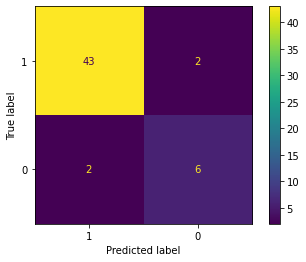

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual_list, heatmap_list)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['1','0'])
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_list,heatmap_list)

0.9245283018867925

In [ ]:
if summ[0]>3:
  if summ[0]>6:
    print('High risk of updating')
  else:
    print("Medium risk of updating")
else:
  print('Low risk of updating')

High risk of updating


In [ ]:
master_data.columns

Index(['ios version', 'MMS_sending', 'Battery', 'phone_freez_crash',
       'app compatibility', 'syncing', 'bluetooth', 'app crash',
       'slow performence', 'security_vulnerabilities', 'Wifi', 'sensor',
       'ringing', 'vibration', 'audio_playback', 'display_issues', 'email_app',
       'game_center', 'air_play', 'air_print', 'safari', 'home_sharing',
       'presonal_hotspot', 'location_tracking', 'face_time', 'iBooks', 'siri',
       'sim_card', 'mobile_network', 'keyboard', 'maps', 'pasbook_app',
       'lock_screen', 'imessage', 'call_audio', 'phone_restart', 'touch_id',
       'app_store', 'music_app', 'camera', 'health_app', 'activation_issue',
       'night_shift', 'voiceover', 'calculator', 'haptic_feedback',
       'auto_correct', 'notification', 'apple_pay', 'icloud', 'charging_issue',
       'face_id', 'voicemail', 'home_pod', 'ios_version', 'total_bugs'],
      dtype='object')

In [ ]:
import numpy as np

columns = master_data.drop(['ios version'], axis=1)
columns = columns.drop(['ios_version'], axis=1)
columns = columns.drop(['total_bugs'], axis=1)
heatmap_list=np.array(heatmap_list)

columns=columns.columns
heatmap_data = pd.DataFrame(heatmap_list, columns)

In [ ]:
heatmap_data.head()

,0
MMS_sending,0.0
Battery,1.0
phone_freez_crash,0.0
app compatibility,1.0
syncing,0.0


In [ ]:
heatmap_list=np.array(heatmap_list)

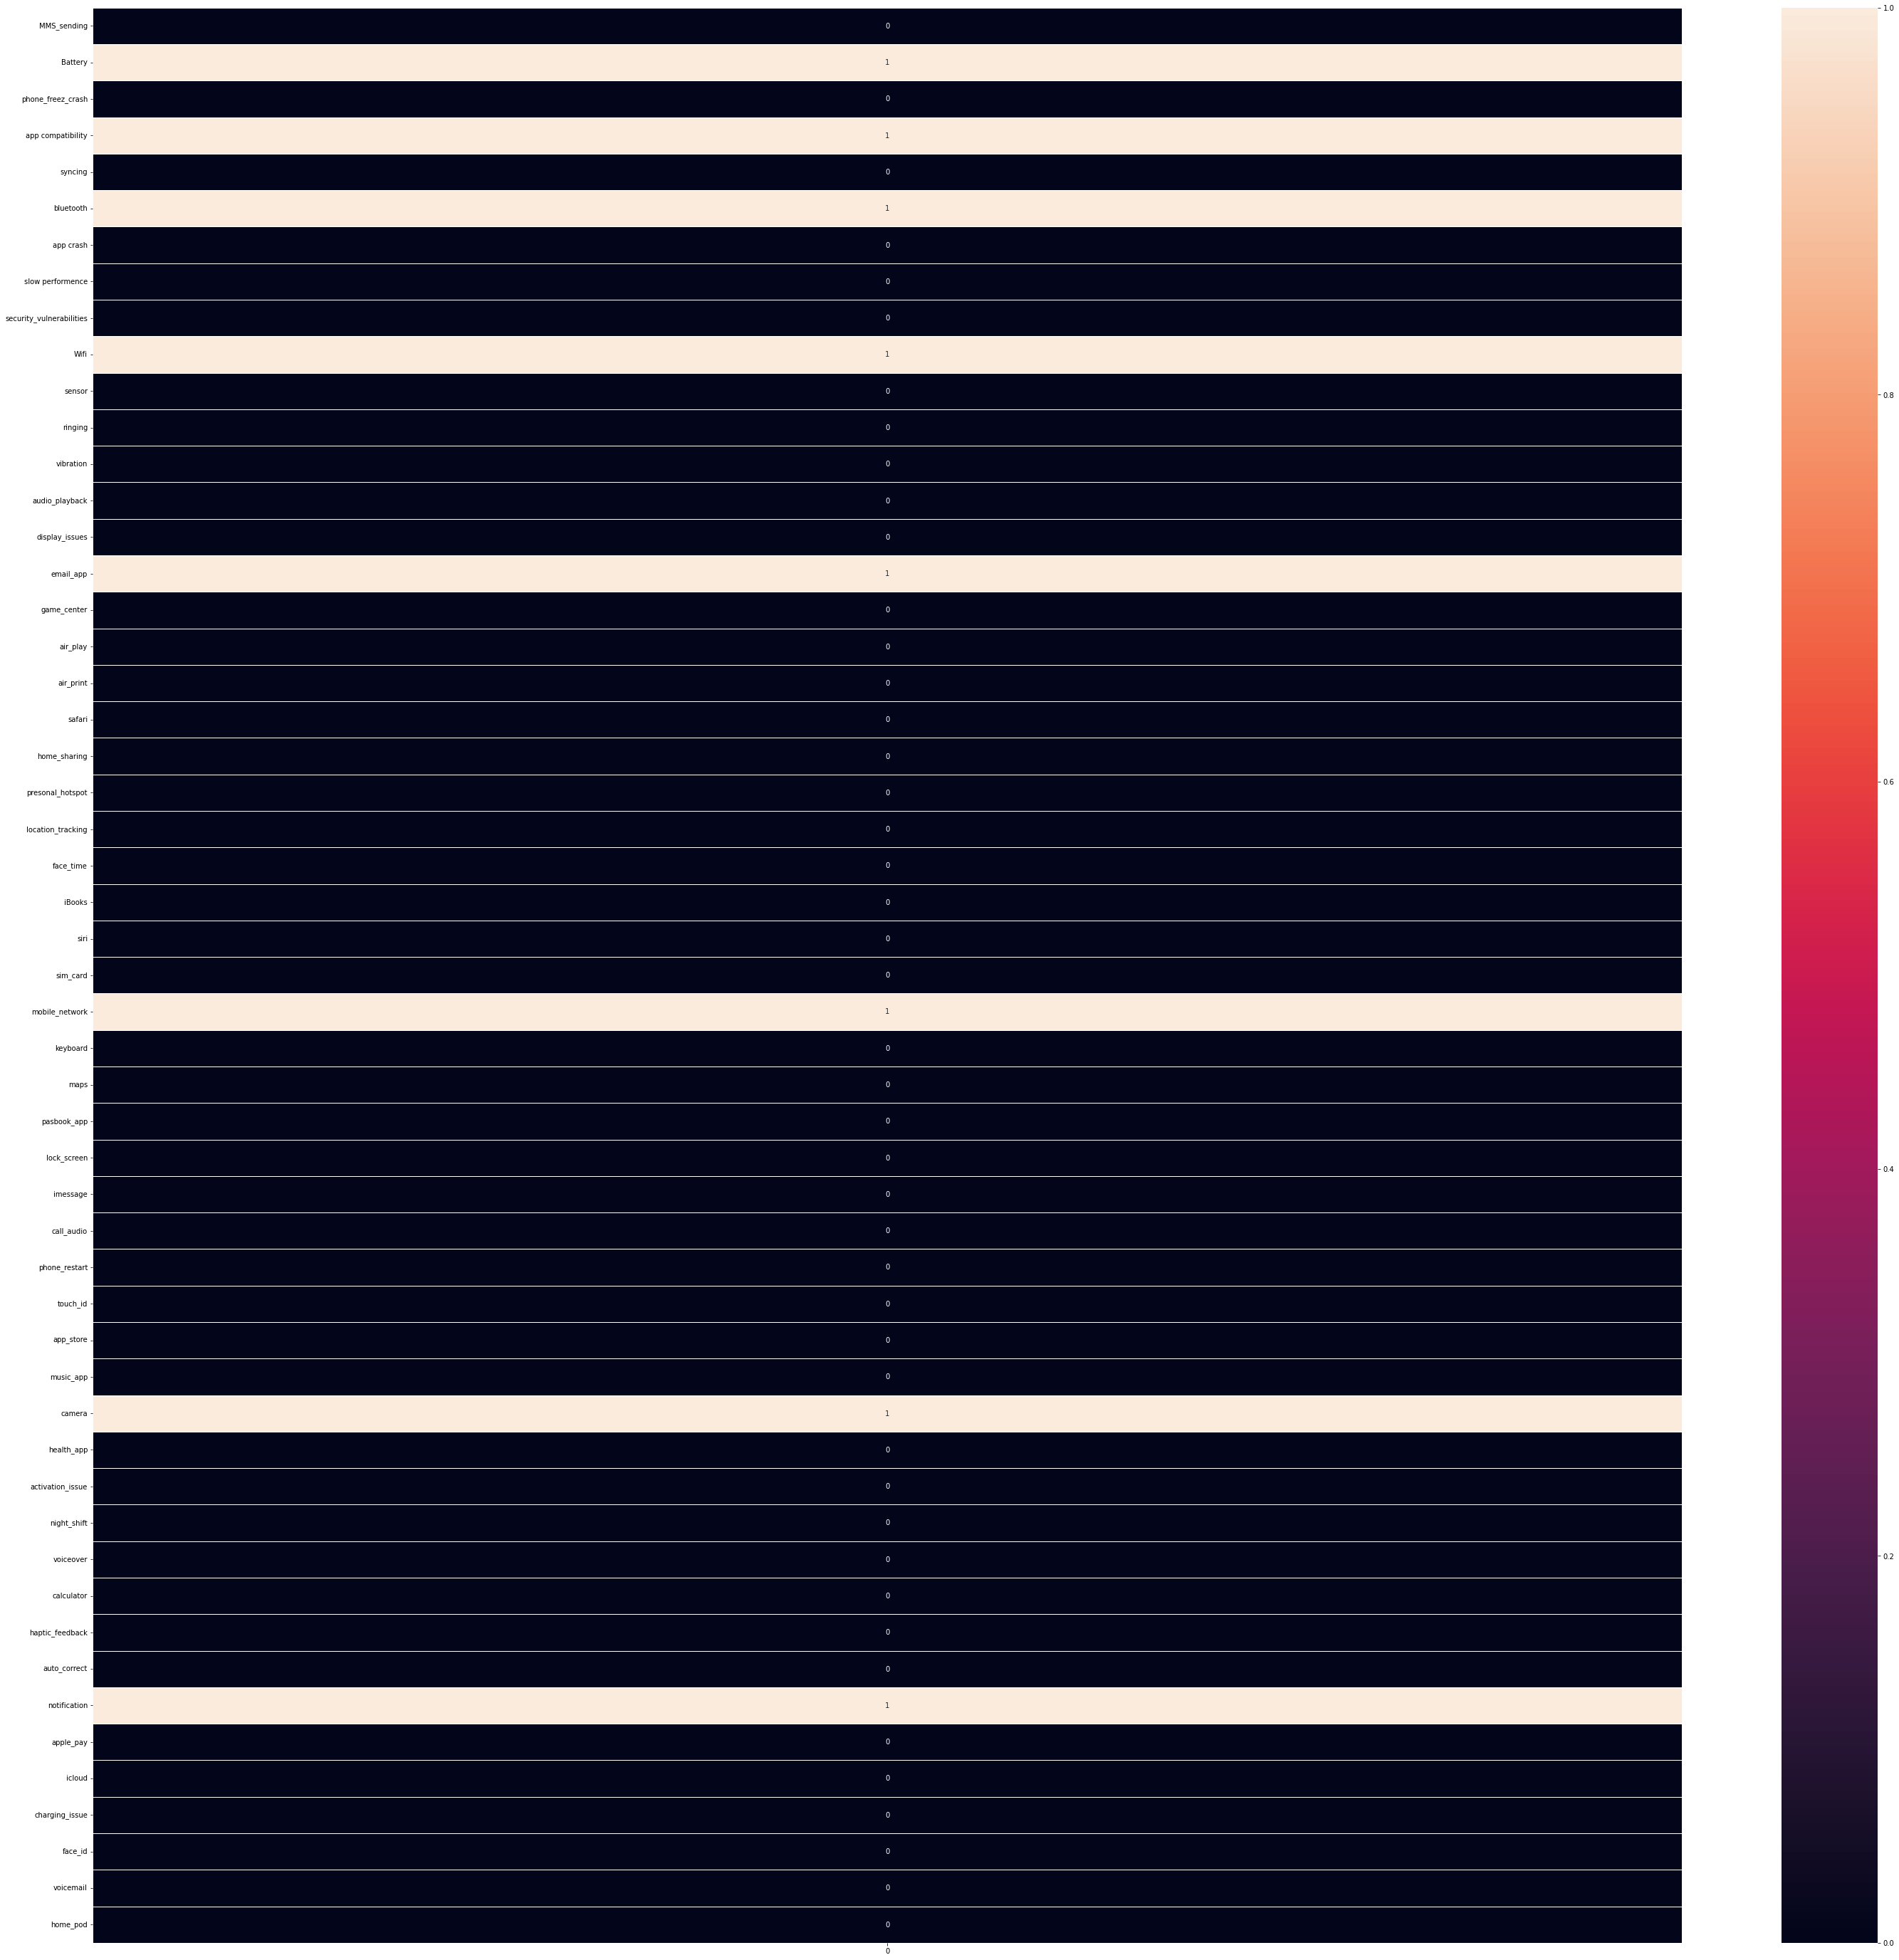

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


plt.figure(figsize = (50,50))
sn.heatmap(data=heatmap_data, annot=True, linewidths=.5)
# displaying the plotted heatmap
plt.show()

In [ ]:
columns = ['ios version', 'total_bugs']
graph_data = pd.DataFrame(master_data, columns=columns)

graph_data

,ios version,total_bugs
0,3,8
1,3.1,6
2,3.1.2,4
3,3.1.3,6
4,3.2,5
...,...,...
138,13.5,4
139,13.5.1,0
140,13.6,4
141,13.6.1,3


In [ ]:
import plotly.express as px
import pandas as pd

fig = px.line_polar(graph_data, r='total_bugs', theta='ios version', line_close=True)
fig.show()

<BarContainer object of 143 artists>

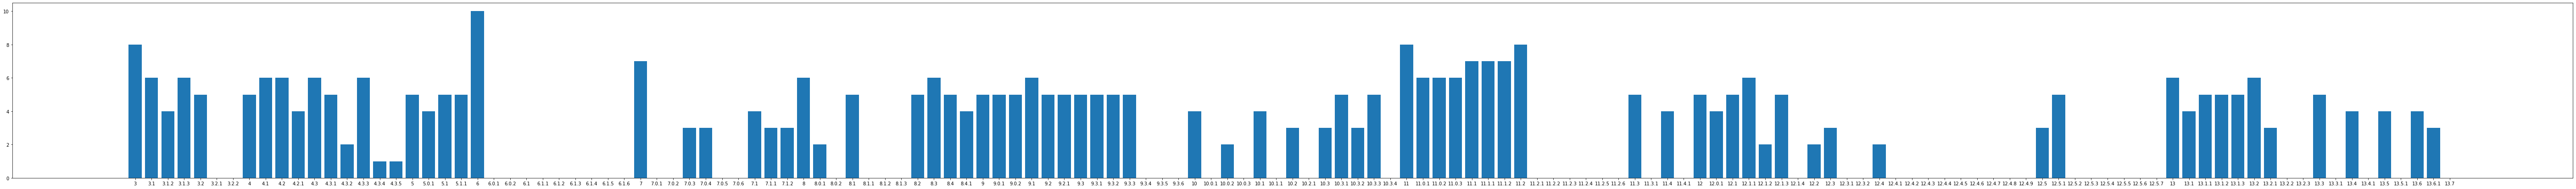

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize =(100, 7))
plt.bar(graph_data['ios version'], graph_data['total_bugs'])

In [ ]:
import numpy as np
np.corrcoef(mydataset_without_null['slow performence'], mydataset_without_null['ios_version'])

array([[ 1.        , -0.07424908],
       [-0.07424908,  1.        ]])

In [ ]:
import numpy as np
np.corrcoef(mydataset_without_null['Battery'], mydataset_without_null['slow performence'])

array([[1.        , 0.23481627],
       [0.23481627, 1.        ]])

In [ ]:
import numpy as np
np.corrcoef(mydataset_without_null['ios_version'], mydataset_without_null['Battery'])

array([[ 1.        , -0.14132672],
       [-0.14132672,  1.        ]])

In [ ]:
import numpy as np
np.corrcoef(mydataset_without_null['slow performence'], mydataset_without_null['Battery'])

array([[1.        , 0.23481627],
       [0.23481627, 1.        ]])

In [ ]:
from scipy.stats import pearsonr

pearsonr(mydataset_without_null['ios_version'], mydataset_without_null['slow performence'])


PearsonRResult(statistic=-0.07424908343707817, pvalue=0.3781476065076909)

In [ ]:
from scipy.stats import pearsonr

pearsonr(mydataset_without_null['Battery'], mydataset_without_null['slow performence'])


PearsonRResult(statistic=0.2348162704561539, pvalue=0.004758682138916357)

In [ ]:
from scipy.stats import pearsonr

pearsonr(mydataset_without_null['Battery'], mydataset_without_null['ios_version'])


PearsonRResult(statistic=-0.14132671648423842, pvalue=0.09224923659602957)